# Linear data

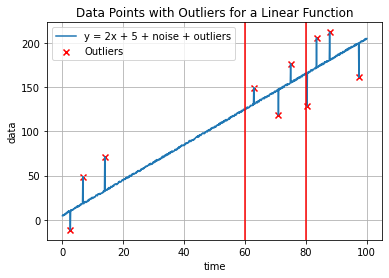

In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

random.seed(7)  # Set a random seed for reproducibility

# Define the parameters of the linear function
m = 2  # Slope
b = 5  # Y-intercept

noise = 1  # Noise level (used to add random noise to the data points)

# Generate data points
num_points = 1000  # Number of data points to generate
x_values = np.linspace(0, 100, num_points)  # Evenly spaced x values between 0 and 100
y_values = [m * x + b + random.uniform(-noise, noise) for x in x_values]  # Calculate y values with some random noise

# Introduce outliers
num_outliers = 10  # Number of outliers to introduce
outlier_indices = random.sample(range(num_points), num_outliers)
for idx in outlier_indices:
    y_values[idx] += random.uniform(-50, 50)  # Add large random values to create outliers

data = pd.DataFrame({'time': x_values, 'data': y_values})
data.sort_values(by=['time'], inplace=True)

# Plot the data points
plt.plot(data['time'], data['data'], label=f'y = {m}x + {b} + noise + outliers')
plt.scatter(data.sort_values(by=['time'])['time'][outlier_indices], data['data'][outlier_indices], c='red', label='Outliers', marker='x')
plt.axvline(x_values[600], color='red')
plt.axvline(x_values[800], color='red')
plt.xlabel('time')
plt.ylabel('data')
plt.title('Data Points with Outliers for a Linear Function')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

data.to_csv('data/linear.csv', index=False)

# Sinusoidal data

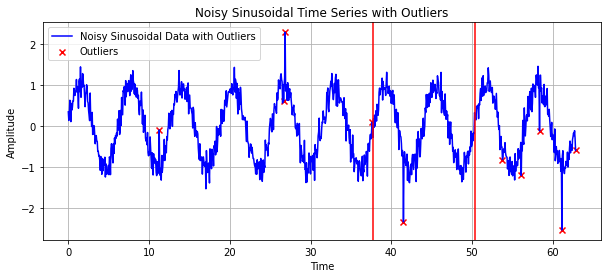

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Set a random seed for reproducibility

# Parameters
num_points = 1000  # Number of data points
num_periods = 10    # Number of periods of the sinusoidal wave
amplitude = 1.0    # Amplitude of the sinusoidal wave
noise_amplitude = 0.2  # Amplitude of the noise

# Generate time values
t = np.linspace(0, 2 * np.pi * num_periods, num_points)

# Generate a sinusoidal curve
sinusoidal_data = amplitude * np.sin(t)

# Add noise
noise = noise_amplitude * np.random.randn(num_points)
noisy_data = sinusoidal_data + noise

# Add outliers
num_outliers = 10  # Number of outliers
outlier_indices = np.random.choice(num_points, num_outliers, replace=False)
outlier_amplitude = 1.5  # Adjust the amplitude of the outliers
noisy_data[outlier_indices] += outlier_amplitude * np.random.randn(num_outliers)

# Plot the noisy sinusoidal curve with outliers
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_data, label='Noisy Sinusoidal Data with Outliers', color='blue')
plt.scatter(t[outlier_indices], noisy_data[outlier_indices], c='red', label='Outliers', marker='x')
plt.axvline(t[600], color='red')
plt.axvline(t[800], color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noisy Sinusoidal Time Series with Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Save the data to a CSV file
import pandas as pd
pd.DataFrame({'time': t, 'data': noisy_data}).to_csv('data/sinusoidal_noisy.csv', index=False)
